In [141]:
import pandas as pd
import matplotlib.pyplot as plt

#read the data
df = pd.read_csv('US-pumpkins.csv')
df = df[df['Package'].str.contains('bushel', case=True, regex=True)]

df.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [142]:
df.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [143]:
# Select relevant columns
new_col = ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
df = df.loc[:, new_col]

# Calculate price
price = (df['Low Price'] + df['High Price']) / 2

# Extract month and day of year
month = pd.to_datetime(df['Date']).dt.month
day_of_year = pd.to_datetime(df['Date']).dt.dayofyear

# Create new DataFrame
N_df = pd.DataFrame(
    {
        'month': month,
        'day_of_year': day_of_year,
        'price': price,
        'low_price': df['Low Price'],
        'high_price': df['High Price'],
        'package': df['Package'],  
        'variety': df['Variety'], 
        'city_name': df['City Name']
    }
)
N_df.loc[df['Package'].str.contains('1 1/9'), 'Price'] = price / 1.1
N_df.loc[df['Package'].str.contains('1/2'), 'Price'] = price * 2

print(N_df)

      month  day_of_year   price  low_price  high_price               package  \
70        9          268  15.000      15.00        15.0  1 1/9 bushel cartons   
71        9          268  18.000      18.00        18.0  1 1/9 bushel cartons   
72       10          275  18.000      18.00        18.0  1 1/9 bushel cartons   
73       10          275  17.000      17.00        17.0  1 1/9 bushel cartons   
74       10          282  15.000      15.00        15.0  1 1/9 bushel cartons   
...     ...          ...     ...        ...         ...                   ...   
1738      9          274  15.000      15.00        15.0    1/2 bushel cartons   
1739      9          274  14.375      13.75        15.0    1/2 bushel cartons   
1740      9          274  12.875      10.75        15.0    1/2 bushel cartons   
1741      9          274  12.000      12.00        12.0    1/2 bushel cartons   
1742      9          274  12.000      12.00        12.0    1/2 bushel cartons   

        variety  city_name 

C:\Users\david\AppData\Local\Temp\ipykernel_15096\3201526771.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  month = pd.to_datetime(df['Date']).dt.month
C:\Users\david\AppData\Local\Temp\ipykernel_15096\3201526771.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(df['Date']).dt.dayofyear


Text(0.5, 0, 'month')

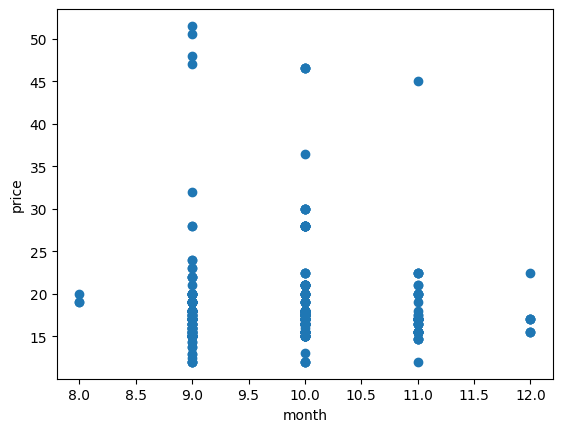

In [144]:

plt.scatter(N_df['month'], N_df['price'])
plt.ylabel('price')
plt.xlabel("month")

Text(0.5, 0, 'day of year')

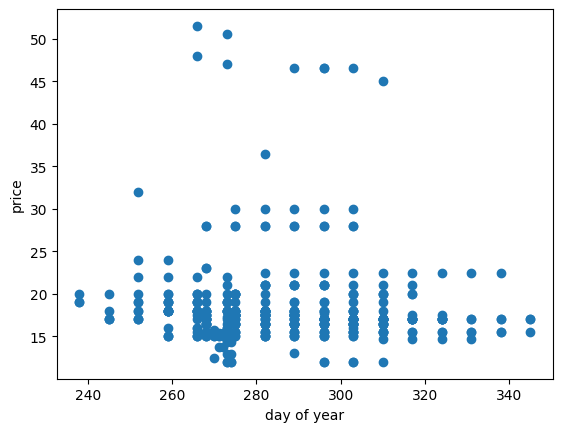

In [145]:
plt.scatter(N_df['day_of_year'], N_df['price'])
plt.ylabel('price')
plt.xlabel("day of year")

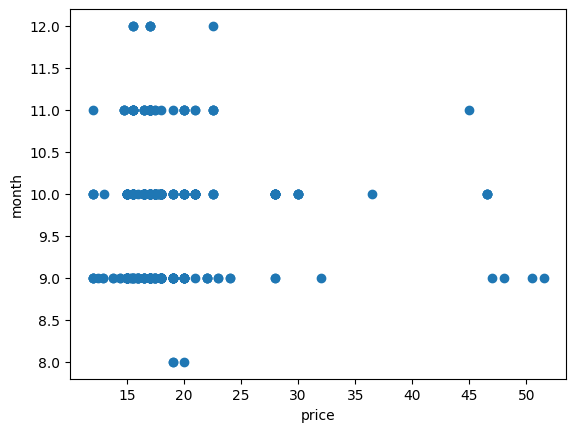

In [146]:
price = N_df['price']
month = N_df['month']

plt.scatter(price,month)
plt.ylabel("month")
plt.xlabel("price")
plt.show()

Text(0, 0.5, 'price')

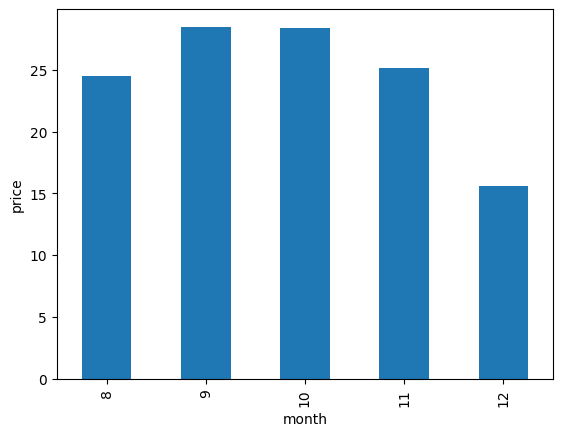

In [147]:
N_df.groupby(['month'])['Price'].mean().plot(kind='bar')

plt.ylabel('price')

In [148]:
print(N_df.columns)

Index(['month', 'day_of_year', 'price', 'low_price', 'high_price', 'package',
       'variety', 'city_name', 'Price'],
      dtype='object')


LINEAR REGRESSION

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

#features
x = N_df['day_of_year'].values.reshape(-1, 1)
y = N_df['price']
#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#training the model
lir = LinearRegression()
lir.fit(x_train,y_train)

#prediction
pred = lir.predict(x_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 6.77 (36.9%)


In [150]:
score = lir.score(x_train,y_train)
print(f'model determination = {score}')

model determination = 0.005119069606344673


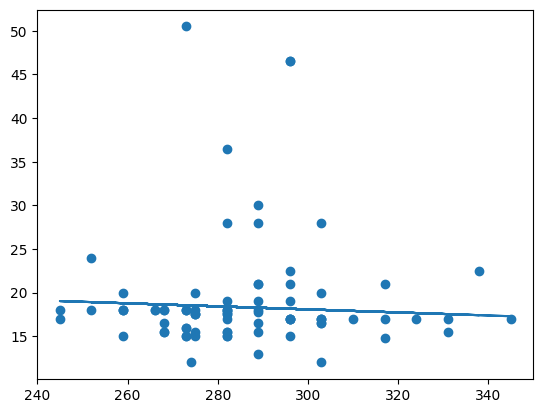

In [151]:
plt.scatter(x_test,y_test)
plt.plot(x_test,pred)

POLYNOMIAL REGRESSION

In [166]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

pipeline = make_pipeline(PolynomialFeatures(2),LinearRegression())

pipeline.fit(x_train,y_train)

# predict results for test data
pred = pipeline.predict(x_test)

# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(x_train,y_train)
print('Model determination: ', score)



Mean error: 6.76 (36.9%)
Model determination:  0.005288474919555197


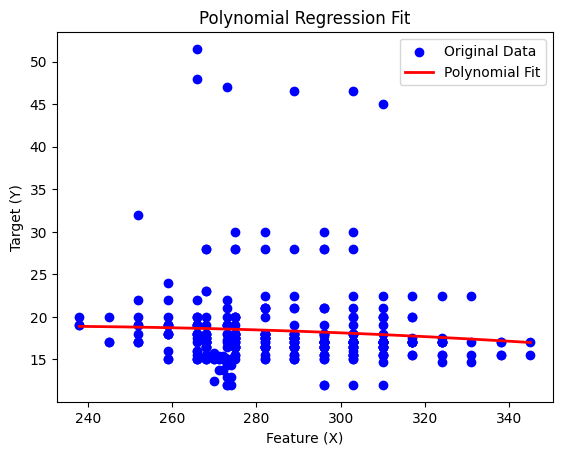

In [164]:
plt.scatter(x_train, y_train, color='blue', label='Original Data')
 
# Generate a range of values for plotting (smooth curve)
x_range = np.linspace(min(x_train), max(x_train), 500).reshape(-1, 1)
y_pred = pipeline.predict(x_range)

# Plot the polynomial regression curve
plt.plot(x_range, y_pred, color='red', label='Polynomial Fit', linewidth=2)

# Labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Target (Y)')
plt.title('Polynomial Regression Fit')
plt.legend()

# Show the plot
plt.show()

POLYNIMAIL REGRESSION WITH ALL FEATURES

In [157]:


# set up training data
X = pd.get_dummies(N_df['variety']) \
        .join(N_df['month']) \
        .join(pd.get_dummies(N_df['city_name'])) \
        .join(pd.get_dummies(N_df['package']))
y = N_df['price']

# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



# setup and train the pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)

# predict results for test data
pred = pipeline.predict(X_test)


# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 1.77 (9.11%)
Model determination:  0.9411019303074228


LINEAR REGRESSION WITH ALL FEATURES

In [161]:
# set up training data
c = pd.get_dummies(N_df['variety']) \
        .join(N_df['month']) \
        .join(pd.get_dummies(N_df['city_name'])) \
        .join(pd.get_dummies(N_df['package']))
w = N_df['price']

# make train-test split
c_train, c_test, w_train, w_test = train_test_split(c, w, test_size=0.2, random_state=0)


#training the model
lir = LinearRegression()
lir.fit(c_train,w_train)

#prediction
pred = lir.predict(c_test)

mse = np.sqrt(mean_squared_error(w_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')
score = lir.score(c_train,w_train)
print(f'model determination = {score}')


Mean error: 2.19 (11.3%)
model determination = 0.8872561623113178
